In [1]:
from fit_model_ import *

### Model 2 is a RNN with Embedding

In [2]:
 #eng_vocab_size, spa_vocab_size, eng_max_Sentence_length, spa_max_sen, units
def define_model_embedding(src_vocab, tar_vocab, src_timesteps, tar_timesteps,n_units,function="softmax"):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    #TODO: Implement
    learning_rate = 1e-3
    rnn = GRU(n_units)
    
    embedding = Embedding(src_vocab, n_units, input_length=src_timesteps,mask_zero=True) 
    logits = TimeDistributed(Dense(tar_vocab, activation=function))
    
    model = Sequential()
    #em can only be used in first layer --> Keras Documentation
    model.add(embedding)
    model.add(rnn)
    model.add(RepeatVector(tar_timesteps))
    model.add(GRU(n_units,return_sequences=True))
    model.add(logits)
    return model

### Variante 1 → tarda 35 minutos

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 256)            581632    
                                                                 
 gru_2 (GRU)                 (None, 256)               394752    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 8, 256)            394752    
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       
                                                                 


125/125 - 20s - loss: 0.3462 - acc: 0.8927 - val_loss: 1.9647 - val_acc: 0.7314 - 20s/epoch - 163ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 1.90093
125/125 - 19s - loss: 0.3303 - acc: 0.8952 - val_loss: 1.9776 - val_acc: 0.7351 - 19s/epoch - 150ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 1.90093
125/125 - 19s - loss: 0.3176 - acc: 0.8973 - val_loss: 1.9801 - val_acc: 0.7317 - 19s/epoch - 149ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 1.90093
125/125 - 18s - loss: 0.3071 - acc: 0.8978 - val_loss: 1.9930 - val_acc: 0.7327 - 18s/epoch - 148ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 1.90093
125/125 - 18s - loss: 0.2965 - acc: 0.8998 - val_loss: 2.0045 - val_acc: 0.7308 - 18s/epoch - 145ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 1.90093
125/125 - 18s - loss: 0.2870 - acc: 0.9010 - val_loss: 2.0095 - val_acc: 0.7333 - 18s/epoch - 144ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 1.9009

Epoch 85/100

Epoch 85: val_loss did not improve from 1.90093
125/125 - 25s - loss: 0.1891 - acc: 0.9073 - val_loss: 2.2640 - val_acc: 0.7327 - 25s/epoch - 200ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 1.90093
125/125 - 25s - loss: 0.1887 - acc: 0.9075 - val_loss: 2.2774 - val_acc: 0.7314 - 25s/epoch - 202ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 1.90093
125/125 - 23s - loss: 0.1884 - acc: 0.9074 - val_loss: 2.2831 - val_acc: 0.7330 - 23s/epoch - 187ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 1.90093
125/125 - 23s - loss: 0.1891 - acc: 0.9067 - val_loss: 2.2733 - val_acc: 0.7318 - 23s/epoch - 186ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 1.90093
125/125 - 25s - loss: 0.1896 - acc: 0.9071 - val_loss: 2.2895 - val_acc: 0.7309 - 25s/epoch - 197ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 1.90093
125/125 - 26s - loss: 0.1899 - acc: 0.9062 - val_loss: 2.2862 - val_acc: 0.7324 - 26s/epoch - 204ms/ste

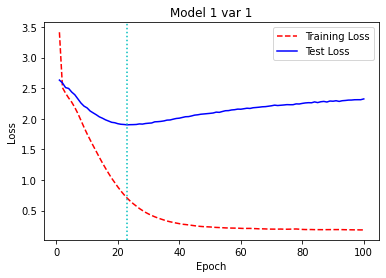

In [6]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_1_1.h5'
history_save_file_name="cp_history_1_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model1_1 = define_model_embedding(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_1,loss_func,learning_rate)
plot_model(model1_1, to_file='model_images/cp_model_1_1_m.png', show_shapes=True)
#train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_1, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model1_1.history, 'loss_vs_epochs_images_100/cp_model_1_1_le.png', 'Model 1 var 1')

### Spanish → English

4510 4510 5 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8, 256)            1154560   
                                                                 
 gru_4 (GRU)                 (None, 256)               394752    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 5, 256)           0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 5, 256)            394752    
                                                                 
 time_distributed_2 (TimeDis  (None, 5, 2272)          583904    
 tributed)                                                       
                                                                 


125/125 - 9s - loss: 0.2365 - acc: 0.9430 - val_loss: 0.2634 - val_acc: 0.9384 - 9s/epoch - 76ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 0.26341
125/125 - 9s - loss: 0.2361 - acc: 0.9430 - val_loss: 0.2635 - val_acc: 0.9383 - 9s/epoch - 75ms/step
Epoch 36/100

Epoch 36: val_loss improved from 0.26341 to 0.26263, saving model to Models100\cp_model_ei_1_1.h5
125/125 - 10s - loss: 0.2357 - acc: 0.9434 - val_loss: 0.2626 - val_acc: 0.9385 - 10s/epoch - 77ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2349 - acc: 0.9434 - val_loss: 0.2632 - val_acc: 0.9386 - 10s/epoch - 78ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2347 - acc: 0.9434 - val_loss: 0.2639 - val_acc: 0.9387 - 10s/epoch - 78ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2334 - acc: 0.9438 - val_loss: 0.2642 - val_acc: 0.9386 - 10s/epoch - 80ms/step
Epoch 40/100

Epoch 

Epoch 84/100

Epoch 84: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2289 - acc: 0.9441 - val_loss: 0.2680 - val_acc: 0.9384 - 10s/epoch - 77ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2290 - acc: 0.9442 - val_loss: 0.2695 - val_acc: 0.9382 - 10s/epoch - 78ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 0.26263
125/125 - 10s - loss: 0.2292 - acc: 0.9441 - val_loss: 0.2687 - val_acc: 0.9384 - 10s/epoch - 81ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.26263
125/125 - 13s - loss: 0.2292 - acc: 0.9441 - val_loss: 0.2686 - val_acc: 0.9382 - 13s/epoch - 101ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 0.26263
125/125 - 11s - loss: 0.2290 - acc: 0.9442 - val_loss: 0.2693 - val_acc: 0.9386 - 11s/epoch - 91ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 0.26263
125/125 - 11s - loss: 0.2289 - acc: 0.9442 - val_loss: 0.2690 - val_acc: 0.9383 - 11s/epoch - 88ms/step
Epo

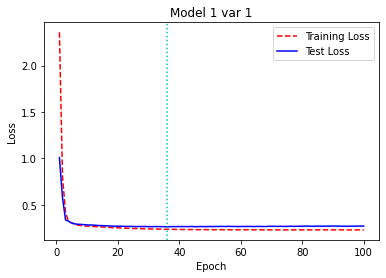

In [7]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_ei_1_1.h5'
history_save_file_name="cp_history_ei_1_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

src_tokenizer,src_vocab_size,src_max_sentence_length = prepare_tokenizer(dataset,1)
tar_tokenizer,tar_vocab_size,tar_max_sentence_length = prepare_tokenizer(dataset,0)
print(src_vocab_size,src_vocab_size,tar_max_sentence_length,tar_max_sentence_length)

trainX, trainY =  preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)


model_ei1_1 = define_model_embedding(src_vocab_size, tar_vocab_size, src_max_sentence_length, tar_max_sentence_length, units)
create_model(model_ei1_1,loss_func,learning_rate)
plot_model(model_ei1_1, to_file='model_images/cp_model_ei_1_1_m.png', show_shapes=True)
#train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model_ei1_1, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model_ei1_1.history, 'loss_vs_epochs_images_100/cp_model_ei_1_1_le.png', 'Model 1 var 1')

### Variante 2

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 32)             72704     
                                                                 
 gru_4 (GRU)                 (None, 32)                6336      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 8, 32)            0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 8, 32)             6336      
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 4510)          148830    
 tributed)                                                       
                                                                 


Epoch 36/100

Epoch 36: val_loss did not improve from 2.10497
125/125 - 12s - loss: 0.8231 - acc: 0.8072 - val_loss: 2.1621 - val_acc: 0.7114 - 12s/epoch - 99ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.10497
125/125 - 13s - loss: 0.8048 - acc: 0.8102 - val_loss: 2.1688 - val_acc: 0.7155 - 13s/epoch - 107ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.10497
125/125 - 14s - loss: 0.7895 - acc: 0.8123 - val_loss: 2.1729 - val_acc: 0.7124 - 14s/epoch - 109ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.10497
125/125 - 13s - loss: 0.7762 - acc: 0.8138 - val_loss: 2.1853 - val_acc: 0.7124 - 13s/epoch - 107ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.10497
125/125 - 13s - loss: 0.7608 - acc: 0.8175 - val_loss: 2.1863 - val_acc: 0.7107 - 13s/epoch - 101ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 2.10497
125/125 - 12s - loss: 0.7456 - acc: 0.8195 - val_loss: 2.2003 - val_acc: 0.7147 - 12s/epoch - 98ms/step


125/125 - 12s - loss: 0.4736 - acc: 0.8648 - val_loss: 2.4242 - val_acc: 0.7119 - 12s/epoch - 98ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.10497
125/125 - 13s - loss: 0.4724 - acc: 0.8659 - val_loss: 2.4372 - val_acc: 0.7082 - 13s/epoch - 101ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.10497
125/125 - 12s - loss: 0.4707 - acc: 0.8649 - val_loss: 2.4294 - val_acc: 0.7092 - 12s/epoch - 98ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.10497
125/125 - 12s - loss: 0.4661 - acc: 0.8666 - val_loss: 2.4536 - val_acc: 0.7110 - 12s/epoch - 97ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.10497
125/125 - 12s - loss: 0.4673 - acc: 0.8650 - val_loss: 2.4536 - val_acc: 0.7081 - 12s/epoch - 99ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 2.10497
125/125 - 14s - loss: 0.4662 - acc: 0.8657 - val_loss: 2.4498 - val_acc: 0.7081 - 14s/epoch - 109ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 2.10497
12

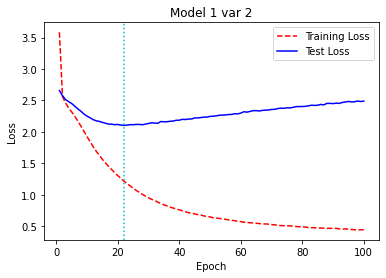

In [7]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_1_2.h5'
history_save_file_name="cp_history_1_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model1_2 = define_model_embedding(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,"softmax")
create_model(model1_2,loss_func,learning_rate)
plot_model(model1_2, to_file='model_images/cp_model_1_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model1_2.history, 'loss_vs_epochs_images_100/cp_model_1_2_le.png', 'Model 1 var 2')

### Spanish → English

4510 2272 8 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8, 32)             144320    
                                                                 
 gru_8 (GRU)                 (None, 32)                6336      
                                                                 
 repeat_vector_4 (RepeatVect  (None, 5, 32)            0         
 or)                                                             
                                                                 
 gru_9 (GRU)                 (None, 5, 32)             6336      
                                                                 
 time_distributed_4 (TimeDis  (None, 5, 2272)          74976     
 tributed)                                                       
                                                                 


125/125 - 4s - loss: 0.2330 - acc: 0.9431 - val_loss: 0.2657 - val_acc: 0.9383 - 4s/epoch - 30ms/step
Epoch 36/100

Epoch 36: val_loss improved from 0.26498 to 0.26451, saving model to Models100\cp_model_ei_1_2.h5
125/125 - 4s - loss: 0.2327 - acc: 0.9431 - val_loss: 0.2645 - val_acc: 0.9385 - 4s/epoch - 34ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 0.26451
125/125 - 4s - loss: 0.2322 - acc: 0.9432 - val_loss: 0.2651 - val_acc: 0.9382 - 4s/epoch - 31ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.26451
125/125 - 4s - loss: 0.2314 - acc: 0.9434 - val_loss: 0.2651 - val_acc: 0.9385 - 4s/epoch - 29ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 0.26451
125/125 - 4s - loss: 0.2311 - acc: 0.9431 - val_loss: 0.2648 - val_acc: 0.9380 - 4s/epoch - 31ms/step
Epoch 40/100

Epoch 40: val_loss improved from 0.26451 to 0.26343, saving model to Models100\cp_model_ei_1_2.h5
125/125 - 4s - loss: 0.2310 - acc: 0.9432 - val_loss: 0.2634 - val_acc: 0.9385 -

Epoch 85/100

Epoch 85: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2253 - acc: 0.9443 - val_loss: 0.2683 - val_acc: 0.9387 - 4s/epoch - 31ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2251 - acc: 0.9443 - val_loss: 0.2671 - val_acc: 0.9386 - 4s/epoch - 31ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2247 - acc: 0.9442 - val_loss: 0.2672 - val_acc: 0.9387 - 4s/epoch - 33ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2247 - acc: 0.9441 - val_loss: 0.2671 - val_acc: 0.9386 - 4s/epoch - 30ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2244 - acc: 0.9443 - val_loss: 0.2668 - val_acc: 0.9387 - 4s/epoch - 29ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 0.26343
125/125 - 4s - loss: 0.2245 - acc: 0.9444 - val_loss: 0.2672 - val_acc: 0.9386 - 4s/epoch - 31ms/step
Epoch 91/100

Ep

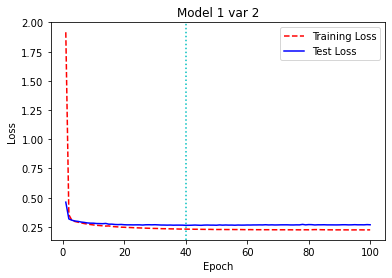

In [9]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_ei_1_2.h5'
history_save_file_name="cp_history_ei_1_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

src_tokenizer,src_vocab_size,src_max_sentence_length = prepare_tokenizer(dataset,1)
tar_tokenizer,tar_vocab_size,tar_max_sentence_length = prepare_tokenizer(dataset,0)
print(src_vocab_size,tar_vocab_size,src_max_sentence_length,tar_max_sentence_length)

trainX, trainY =  preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

modelei1_2 = define_model_embedding(src_vocab_size, tar_vocab_size, src_max_sentence_length, tar_max_sentence_length, units,"softmax")
create_model(modelei1_2,loss_func,learning_rate)
plot_model(modelei1_2, to_file='model_images/cp_model_ei_1_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, modelei1_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(modelei1_2.history, 'loss_vs_epochs_images_100/cp_model_ei_1_2_le.png', 'Model 1 var 2')

### Variante 3

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 64)             145408    
                                                                 
 gru_6 (GRU)                 (None, 64)                24960     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 8, 64)            0         
 or)                                                             
                                                                 
 gru_7 (GRU)                 (None, 8, 64)             24960     
                                                                 
 time_distributed_3 (TimeDis  (None, 8, 4510)          293150    
 tributed)                                                       
                                                                 


Epoch 33/100

Epoch 33: val_loss improved from 2.03496 to 2.01720, saving model to Models100\cp_model_1_3.h5
63/63 - 12s - loss: 1.1526 - acc: 0.7571 - val_loss: 2.0172 - val_acc: 0.7126 - 12s/epoch - 198ms/step
Epoch 34/100

Epoch 34: val_loss did not improve from 2.01720
63/63 - 12s - loss: 1.1112 - acc: 0.7613 - val_loss: 2.0180 - val_acc: 0.7122 - 12s/epoch - 196ms/step
Epoch 35/100

Epoch 35: val_loss improved from 2.01720 to 2.01638, saving model to Models100\cp_model_1_3.h5
63/63 - 12s - loss: 1.0779 - acc: 0.7665 - val_loss: 2.0164 - val_acc: 0.7124 - 12s/epoch - 198ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.01638 to 2.01312, saving model to Models100\cp_model_1_3.h5
63/63 - 13s - loss: 1.0460 - acc: 0.7699 - val_loss: 2.0131 - val_acc: 0.7138 - 13s/epoch - 199ms/step
Epoch 37/100

Epoch 37: val_loss improved from 2.01312 to 2.01058, saving model to Models100\cp_model_1_3.h5
63/63 - 13s - loss: 1.0121 - acc: 0.7749 - val_loss: 2.0106 - val_acc: 0.7129 - 13s/epoch 

Epoch 81/100

Epoch 81: val_loss did not improve from 2.00458
63/63 - 13s - loss: 0.4086 - acc: 0.8782 - val_loss: 2.1402 - val_acc: 0.7192 - 13s/epoch - 202ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 2.00458
63/63 - 12s - loss: 0.4096 - acc: 0.8787 - val_loss: 2.1446 - val_acc: 0.7166 - 12s/epoch - 197ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.00458
63/63 - 12s - loss: 0.4061 - acc: 0.8784 - val_loss: 2.1475 - val_acc: 0.7167 - 12s/epoch - 195ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.00458
63/63 - 12s - loss: 0.4003 - acc: 0.8797 - val_loss: 2.1566 - val_acc: 0.7185 - 12s/epoch - 194ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.00458
63/63 - 12s - loss: 0.3900 - acc: 0.8823 - val_loss: 2.1563 - val_acc: 0.7181 - 12s/epoch - 195ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.00458
63/63 - 13s - loss: 0.3843 - acc: 0.8826 - val_loss: 2.1628 - val_acc: 0.7169 - 13s/epoch - 206ms/step
Epoch 87/1

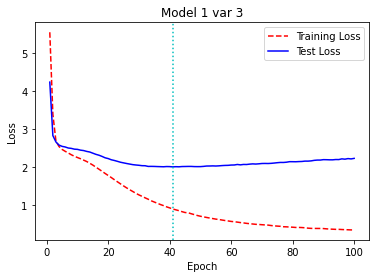

In [8]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_1_3.h5'
history_save_file_name="cp_history_1_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model1_3 = define_model_embedding(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,"sigmoid")
create_model(model1_3,loss_func,learning_rate)
plot_model(model1_3, to_file='model_images/cp_model_1_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model1_3.history, 'loss_vs_epochs_images_100/cp_model_1_3_le.png', 'Model 1 var 3')

### Spanish → English

4510 2272 8 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 8, 64)             288640    
                                                                 
 gru_10 (GRU)                (None, 64)                24960     
                                                                 
 repeat_vector_5 (RepeatVect  (None, 5, 64)            0         
 or)                                                             
                                                                 
 gru_11 (GRU)                (None, 5, 64)             24960     
                                                                 
 time_distributed_5 (TimeDis  (None, 5, 2272)          147680    
 tributed)                                                       
                                                                 


63/63 - 4s - loss: 0.2495 - acc: 0.9354 - val_loss: 0.2752 - val_acc: 0.9332 - 4s/epoch - 61ms/step
Epoch 35/100

Epoch 35: val_loss improved from 0.27479 to 0.27343, saving model to Models100\cp_model_ei_1_3.h5
63/63 - 4s - loss: 0.2488 - acc: 0.9362 - val_loss: 0.2734 - val_acc: 0.9342 - 4s/epoch - 68ms/step
Epoch 36/100

Epoch 36: val_loss improved from 0.27343 to 0.26582, saving model to Models100\cp_model_ei_1_3.h5
63/63 - 4s - loss: 0.2434 - acc: 0.9379 - val_loss: 0.2658 - val_acc: 0.9360 - 4s/epoch - 63ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 0.26582
63/63 - 4s - loss: 0.2400 - acc: 0.9391 - val_loss: 0.2667 - val_acc: 0.9367 - 4s/epoch - 68ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.26582
63/63 - 4s - loss: 0.2390 - acc: 0.9391 - val_loss: 0.2668 - val_acc: 0.9369 - 4s/epoch - 67ms/step
Epoch 39/100

Epoch 39: val_loss improved from 0.26582 to 0.26497, saving model to Models100\cp_model_ei_1_3.h5
63/63 - 4s - loss: 0.2392 - acc: 0.9391 

Epoch 82/100

Epoch 82: val_loss did not improve from 0.26150
63/63 - 4s - loss: 0.2251 - acc: 0.9438 - val_loss: 0.2651 - val_acc: 0.9382 - 4s/epoch - 64ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 0.26150
63/63 - 4s - loss: 0.2244 - acc: 0.9436 - val_loss: 0.2648 - val_acc: 0.9386 - 4s/epoch - 65ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 0.26150
63/63 - 4s - loss: 0.2247 - acc: 0.9437 - val_loss: 0.2648 - val_acc: 0.9385 - 4s/epoch - 67ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 0.26150
63/63 - 4s - loss: 0.2244 - acc: 0.9437 - val_loss: 0.2642 - val_acc: 0.9385 - 4s/epoch - 67ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 0.26150
63/63 - 4s - loss: 0.2244 - acc: 0.9438 - val_loss: 0.2659 - val_acc: 0.9385 - 4s/epoch - 68ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.26150
63/63 - 5s - loss: 0.2240 - acc: 0.9437 - val_loss: 0.2647 - val_acc: 0.9383 - 5s/epoch - 73ms/step
Epoch 88/100

Epoch 88: val_

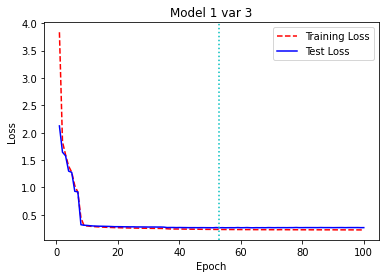

In [10]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_ei_1_3.h5'
history_save_file_name="cp_history_ei_1_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

src_tokenizer,src_vocab_size,src_max_sentence_length = prepare_tokenizer(dataset,1)
tar_tokenizer,tar_vocab_size,tar_max_sentence_length = prepare_tokenizer(dataset,0)
print(src_vocab_size,tar_vocab_size,src_max_sentence_length,tar_max_sentence_length)

trainX, trainY =  preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

modelei1_3 = define_model_embedding(src_vocab_size, tar_vocab_size, src_max_sentence_length, tar_max_sentence_length, units,"sigmoid")
create_model(modelei1_3,loss_func,learning_rate)
plot_model(modelei1_3, to_file='model_images/cp_model_ei_1_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, modelei1_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(modelei1_3.history, 'loss_vs_epochs_images_100/cp_model_ei_1_3_le.png', 'Model 1 var 3')

Text(0, 0.5, 'LOSS')

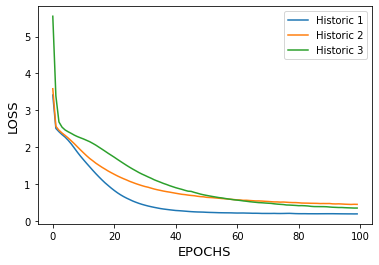

In [9]:
hist1 = load_history("cp_history_1_1.npy")
hist2 = load_history("cp_history_1_2.npy")
hist3 = load_history("cp_history_1_3.npy")
for x in ['loss']:
    plt.plot(hist1[x],label="Historic 1")
    plt.plot(hist2[x],label="Historic 2")
    plt.plot(hist3[x],label="Historic 3")
plt.legend()
plt.xlabel("EPOCHS",fontsize=13)
plt.ylabel("LOSS",fontsize=13)

In [1]:
## Historic 1 el mejor

In [3]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_ohe_1_1.h5'
history_save_file_name="cp_model_ohe_1_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=True)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=True)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model1_1_ohe = define_model_embedding(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_1_ohe,loss_func,learning_rate)
plot_model(model1_1_ohe, to_file='model_images/cp_model_ohe_1_1_m.png', show_shapes=True)
#train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_1_ohe, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model1_1_ohe.history, 'loss_vs_epochs_images_100/cp_model_ohe_1_1_le.png', 'Model 1 var 1')

2272 4510 5 8


MemoryError: Unable to allocate 1.78 GiB for an array with shape (239318640,) and data type float64